In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


# Reshape to fit the model (28x28 images with 1 channel)

In [3]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# One-hot encode labels

In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN Model

In [5]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


C:\Users\Sandipan Jana\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#  Compile the Model

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


 # Train the Model

In [7]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.8183 - loss: 0.5768 - val_accuracy: 0.9815 - val_loss: 0.0652
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9689 - loss: 0.0950 - val_accuracy: 0.9878 - val_loss: 0.0496
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9797 - loss: 0.0676 - val_accuracy: 0.9892 - val_loss: 0.0373
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9838 - loss: 0.0538 - val_accuracy: 0.9887 - val_loss: 0.0373
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9863 - loss: 0.0434 - val_accuracy: 0.9915 - val_loss: 0.0277
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9882 - loss: 0.0370 - val_accuracy: 0.9920 - val_loss: 0.0272
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9887 - loss: 0.0349 - val_accuracy: 0.9922 - val_loss: 0.0268
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - accuracy: 0.9893 - loss: 0.0326 - 

#  Evaluate the Model

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9901 - loss: 0.0257
Test Accuracy: 0.9930


# Visualize Training Performance

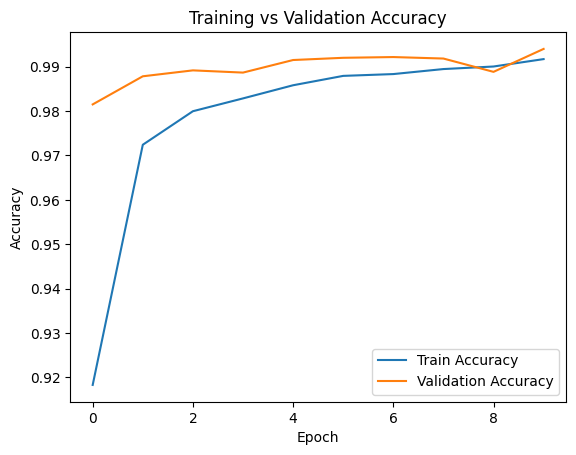

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


 # UI to Draw and Predict Digits (Basic Version)